In [2]:
%load_ext autoreload
%aimport data_creater
%autoreload 1

from data_creater import *
import re, time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
stocks = companies()
symbols = stocks['Symbol'].values.tolist()
stocks
# stocks[stocks.Industry == 'Technology']

,Company,Symbol,Industry
0,Agilent Technologies Inc.,A,Agilent Technologies Inc.
1,American Airlines Group Inc.,AAL,American Airlines Group Inc.
2,Advance Auto Parts Inc.,AAP,Advance Auto Parts Inc.
3,Apple Inc.,AAPL,Apple Inc.
4,AbbVie Inc.,ABBV,AbbVie Inc.
...,...,...,...
471,Xylem Inc.,XYL,Xylem Inc.
472,Yum! Brands Inc.,YUM,Yum! Brands Inc.
473,Zimmer Biomet Holdings Inc.,ZBH,Zimmer Biomet Holdings Inc.
474,Zions Bancorporation N.A.,ZION,Zions Bancorporation N.A.


In [11]:
start_date = '20181101' 
end_date = '20191115'

#download quotes from yahoo and save to directory
for ticker in symbols:
    print(ticker)
    download = Downloader(ticker,start_date, end_date)
    download.save()
    time.sleep(2)

A
AAL


KeyboardInterrupt: 

In [33]:
symbol = 'AAPL'
target_dfs = pd.read_csv('./data/{0}/normalized.csv'.format(symbol),  index_col=[0], parse_dates=[0])
dfs = []
for symbol_tem in symbols:
    try:
        if symbol_tem == symbol or symbol_tem == 'BTC-USD':
            pass
        df = pd.read_csv('./data/{0}/normalized.csv'.format(symbol_tem), index_col=[0], parse_dates=[0]) 
        df = df.set_index(df['date'])
        specific_col = [col for col in df.columns if re.match('normal.*', col)]
        specific_col = [col for col in specific_col if col != 'normal_weekday']
        df_part = df[specific_col]
        df_part.columns = [symbol_tem + '_' + col for col in df_part.columns]   # if not bool(re.match('.*delta.*', col)) 
        if df_part.shape[0] != 248:
            print(symbol_tem)
        dfs.append(df_part)
    except:
        continue

finaldf_ = pd.concat(dfs, axis=1, join='outer')
finaldf_ = finaldf_.reset_index(['date'])
finaldf = target_dfs.merge(finaldf_, on='date', how='left')
finaldf.to_csv('./data/{0}/all_normalized.csv'.format(symbol), index = False)

In [17]:
file_path = "./data/{}/quotes.csv"

for ticker in symbols:
    print(ticker)
    if os.path.isfile(file_path.format(ticker)):
        feature = Feature_Selection.read_csv(ticker, file_path.format(ticker))
        feature.calculate_features()
        feature.normalize_data()
        feature.save_stock_data()
        feature.save_normalized_data()
        
#         target_dfs = pd.read_csv('./data/{0}/normalized.csv'.format(ticker),  index_col=[0], parse_dates=[0])
#         finaldf = target_dfs
#         finaldf.to_csv('./data/{0}/all_normalized.csv'.format(ticker), index = False)
        

A
AAL
AAP
AAPL
ABBV
ABC
ABMD
ABT
ACN
ADBE
ADI
ADM
ADP
ADS
ADSK
AEE
AEP
AES
AFL
AGN
AIG
AIV
AIZ
AJG
AKAM
ALB
ALGN
ALK
ALL
ALLE
ALXN
AMAT
AMCR
AMD
AME
AMG
AMGN
AMP
AMT
AMZN
ANET
ANSS
ANTM
AON
AOS
APA
APD
APH
APTV
ARE
ARNC
ATO
ATVI
AVB
AVGO
AVY
AWK
AXP
AZO
BA
BAC
BAX
BBT
BBY
BDX
BEN
BIIB
BK
BKNG
BLK
BLL
BMY
BR
BSX
BWA
BXP
C
CAG
CAH
CASH_USD
CAT
CB
CBOE
CBRE
CBS
CCI
CCL
CDNS
CDW
CE
CELG
CERN
CF
CFG
CHD
CHRW
CHTR
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COG
COO
COP
COST
COTY
CPB
CPRI
CPRT
CRM
CSCO
CSX
CTAS
CTL
CTSH
CTVA
CTXS
CVS
CVX
CXO
D
DAL
DD
DE
DFS
DG
DGX
DHI
DHR
DIS
DISCA
DISCK
DISH
DLR
DLTR
DOV
DOW
DRE
DRI
DTE
DUK
DVA
DVN
DXC
EA
EBAY
ECL
ED
EFX
EIX
EL
EMR
EOG
EQIX
EQR
ES
ESS
ETFC
ETN
ETR
EVRG
EW
EXC
EXPD
EXPE
EXR
F
FANG
FAST
FB
FBHS
FCX
FDX
FE
FFIV
FIS
FISV
FITB
FLIR
FLS
FLT
FMC
FOX
FOXA
FRC
FRT
FTI
FTNT
FTV
GD
GE
GILD
GIS
GL
GLW
GM
GOOG
GOOGL
GPC
GPN
GPS
GRMN
GS
GWW
HAL
HAS
HBAN
HBI
HCA
HD
HES
HFC
HIG
HLT
HOG
HOLX
HON
HP
HPE
HPQ
HRB
HRL
HSIC
HST
HSY
HUM
IBM
ICE
IDXX
IEX
I

In [18]:

for symbol in symbols:
    print(symbol)
    target_dfs = pd.read_csv('./data/{0}/normalized.csv'.format(symbol),  index_col=[0], parse_dates=[0])
    dfs = []
    for symbol_tem in symbols:
        if symbol_tem == symbol or symbol_tem == 'BTC-USD':
            pass
        df = pd.read_csv('./data/{0}/normalized.csv'.format(symbol_tem), index_col=[0], parse_dates=[0]) 
        df = df.set_index(df['date'])
        specific_col = [col for col in df.columns if re.match('normal.*', col)]
        specific_col = [col for col in specific_col if col != 'normal_weekday']
        df_part = df[specific_col]
        df_part.columns = [symbol_tem + '_' + col for col in df_part.columns]   # if not bool(re.match('.*delta.*', col)) 
        dfs.append(df_part)

    finaldf_ = pd.concat(dfs, axis=1, join='outer')
    finaldf_ = finaldf_.reset_index(['date'])
    finaldf = target_dfs.merge(finaldf_, on='date', how='left')
    finaldf.to_csv('./data/{0}/all_normalized.csv'.format(symbol), index = False)


A


FileNotFoundError: [Errno 2] File b'./data/AIZ/normalized.csv' does not exist: b'./data/AIZ/normalized.csv'

In [107]:
# symbol = 'AAPL'
for symbol in symbols:
    target_dfs = pd.read_csv('./data/{0}/normalized.csv'.format(symbol),  index_col=[0], parse_dates=[0])
    dfs = []
    for symbol_tem in symbols:
        if symbol_tem == symbol :
            pass
        df = pd.read_csv('./data/{0}/normalized.csv'.format(symbol_tem), index_col=[0], parse_dates=[0]) 
        df = df.set_index(df['date'])
        df = df.drop(columns = ['date', 'open', 'high', 'low', 'volume', 'close', 'close_delta_1', 'close_delta_2', 'close_delta_3'])
        df.columns = [symbol_tem + '_' + col for col in df.columns]   # if not bool(re.match('.*delta.*', col)) 
        dfs.append(df)

    finaldf_ = pd.concat(dfs, axis=1, join='outer')
    finaldf_ = finaldf_.reset_index(['date'])
    finaldf = target_dfs.merge(finaldf_, on='date', how='left')
    finaldf.to_csv('./data/{0}/all_normalized.csv'.format(symbol), index = False)



KeyError: "['close_delta_1' 'close_delta_2' 'close_delta_3'] not found in axis"

In [72]:
#.set_index('index')
finaldf.reset_index(inplace=True)
finaldf 

,index,date,open,high,low,volume,close,returns,mfi,normal_open_,...,GOOG_normal_mfi,FB_returns,FB_mfi,FB_normal_open_,FB_normal_high,FB_normal_low,FB_normal_volume,FB_normal_close,FB_normal_returns,FB_normal_mfi
0,0,2019-01-22,156.410004,156.729996,152.619995,30394000,151.484207,-0.022702,62.471911,-0.949115,...,0.353614,-0.016599,69.031480,-0.853045,-0.836387,-0.872896,-0.562203,-0.888596,-0.320275,0.441114
1,1,2019-01-23,154.149994,155.139999,151.699997,23130600,152.096848,0.004036,64.143601,-0.999115,...,0.197374,-0.022408,61.673987,-0.882694,-0.924140,-0.982173,-0.627144,-0.996374,-0.384561,0.213032
2,2,2019-01-24,154.110001,154.479996,151.740005,25441500,150.891296,-0.007958,71.969077,-1.000000,...,0.231859,0.010547,61.662874,-1.000000,-1.000000,-1.000000,-0.602735,-0.945946,-0.019860,0.212687
3,3,2019-01-25,155.479996,158.130005,154.320007,33535500,155.891357,0.032600,70.664551,-0.969690,...,0.180547,0.021572,61.069883,-0.908476,-0.891032,-0.867283,-0.566233,-0.841134,0.102145,0.194304
4,4,2019-01-28,155.789993,156.330002,153.660004,26192100,154.448654,-0.009298,62.946897,-0.962832,...,-0.054408,-0.010389,55.201690,-0.890106,-0.918997,-0.878178,-0.757859,-0.891892,-0.251546,0.012390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,189,2019-10-21,237.520004,240.990005,237.320007,21811800,240.509995,0.017194,65.350606,0.845354,...,-0.028815,0.020820,63.634869,0.366419,0.397300,0.460218,-0.968201,0.501978,0.093827,0.273819
190,190,2019-10-22,241.160004,242.199997,239.619995,20573400,239.960007,-0.002289,73.420131,0.925885,...,0.023929,-0.039887,61.958947,0.461811,0.421086,0.286893,-0.643115,0.257416,-0.577990,0.221865
191,191,2019-10-23,242.100006,243.240005,241.220001,18957200,243.179993,0.013330,80.580307,0.946682,...,0.279615,0.020680,61.203031,0.204318,0.283832,0.303400,-0.849222,0.382993,0.092272,0.198432
192,192,2019-10-24,244.509995,244.800003,241.809998,17318800,243.580002,0.001644,79.677086,1.000000,...,0.273424,0.001235,61.516435,0.288430,0.295082,0.329812,-0.874480,0.390574,-0.122914,0.208148


In [ ]:
dfs = [pd.read_csv(f, index_col=[0], parse_dates=[0]) for f in [] if f.endswith('csv')]

finaldf = pd.concat(dfs, axis=1, join='inner').sort_index()

In [12]:
import sys
!{sys.executable} -m pip install AlgoTraderLib

/Users/bacon_huang/opt/anaconda3/bin/python: No module named pip3


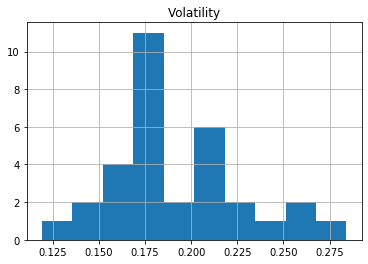

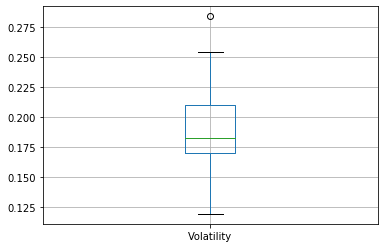

,Volatility
count,32.000000
mean,0.191962
std,0.035089
min,0.119175
25%,0.170242
50%,0.182394
75%,0.210312
max,0.284139


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

vols = [Volatility(ticker).annual for ticker in symbols]
dataset = pd.DataFrame({'Symbol':symbols,'Volatility':vols})

#volatility distribution
dataset.hist()
plt.show()
plt.savefig("./images/volatility_distribution.png")

#box plot to show range
dataset.boxplot()
plt.show()

#volatility statistics
dataset.describe()